# Plot Radar Data

### This notebook demonstrates plotting NEXRAD level 2 data using Python. Note that these are .ar2v formatted files (the .ar2v files use a custom BZip2 compression scheme, meaning standard BZip2 decompression tools will not work). AWS has _V06 data (these files contain a complete volume scan of the radar data, which is a set of sweeps at different elevation angles).

### Import Packages

In [ ]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.calc import azimuth_range_to_lat_lon
from metpy.plots import colortables, USSTATES, USCOUNTIES
from metpy.plots import add_metpy_logo
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Example of how to dump the version of the package


## Get Data from https://thredds.ucar.edu/thredds/catalog/catalog.html
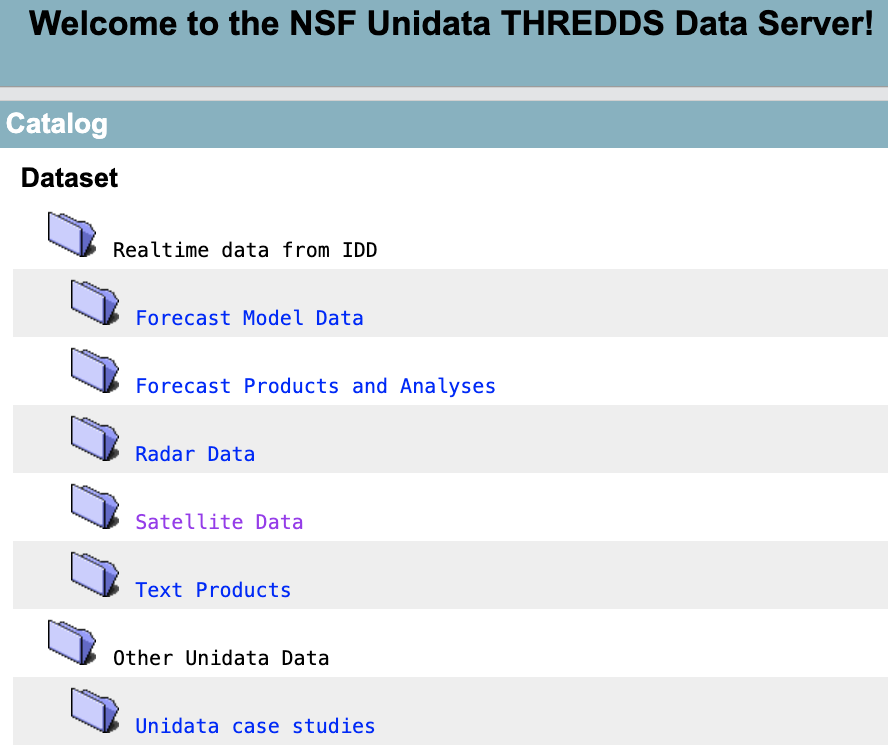


### These data are archived for approximately 4 months on this server


In [ ]:
#Pull most recent reflectivity data
date = datetime(2025, 9, 14, 21, 0)

# Create variables for URL generation, starting with radar name
station = 'KBIS'

# Construct the data_url string (Unidata THREDDS server). Note that this is level 2 data
data_url = (f'https://thredds.ucar.edu/thredds/catalog/nexrad/level2/{station}/{date:%Y%m%d}/catalog.html')

# Get list of files available for a particular day
cat = TDSCatalog(data_url)

# Grab dataset for desired time
dataset = 

ds = xr.open_dataset(dataset.access_urls['OPENDAP'], decode_times=False,
                     decode_coords=False, mask_and_scale=True)

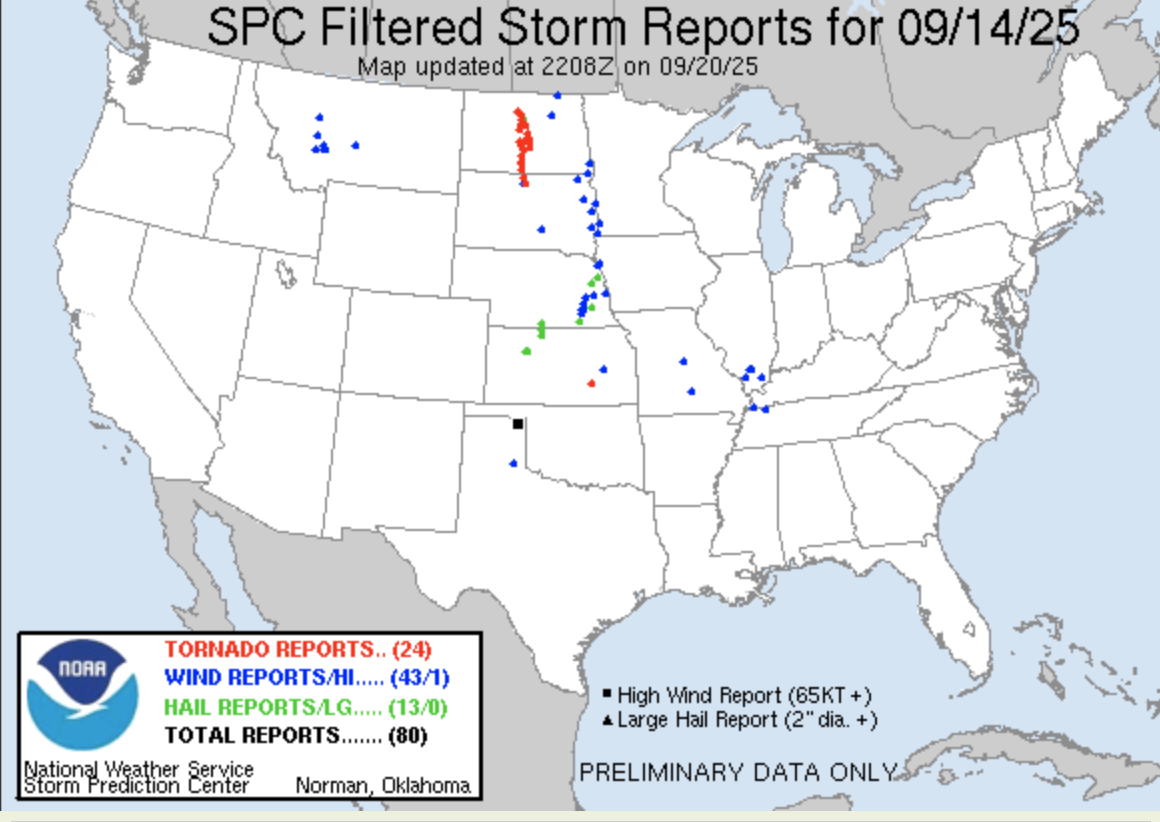

In [ ]:
#What's in the dataset?


In [ ]:
#Pathname for the file on the Unidata THREDDS server 
data_url

## Parse Data, Create Lat/Lon

In [ ]:
station = 
slat    = 
slon    = 
elevation = 
vtime = datetime.strptime(ds.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')

sweep = 
rng   = 
az    = 
ref   = 

#DRL Convert azimuth and range locations in a polar coordinate system to lat/lon coordinates. 
#  See https://unidata.github.io/MetPy/v1.5/api/generated/metpy.calc.azimuth_range_to_lat_lon.html


#DRL Diagnostic


## Make Plot. For colortable options see: https://unidata.github.io/MetPy/v1.5/api/generated/metpy.plots.ctables.html 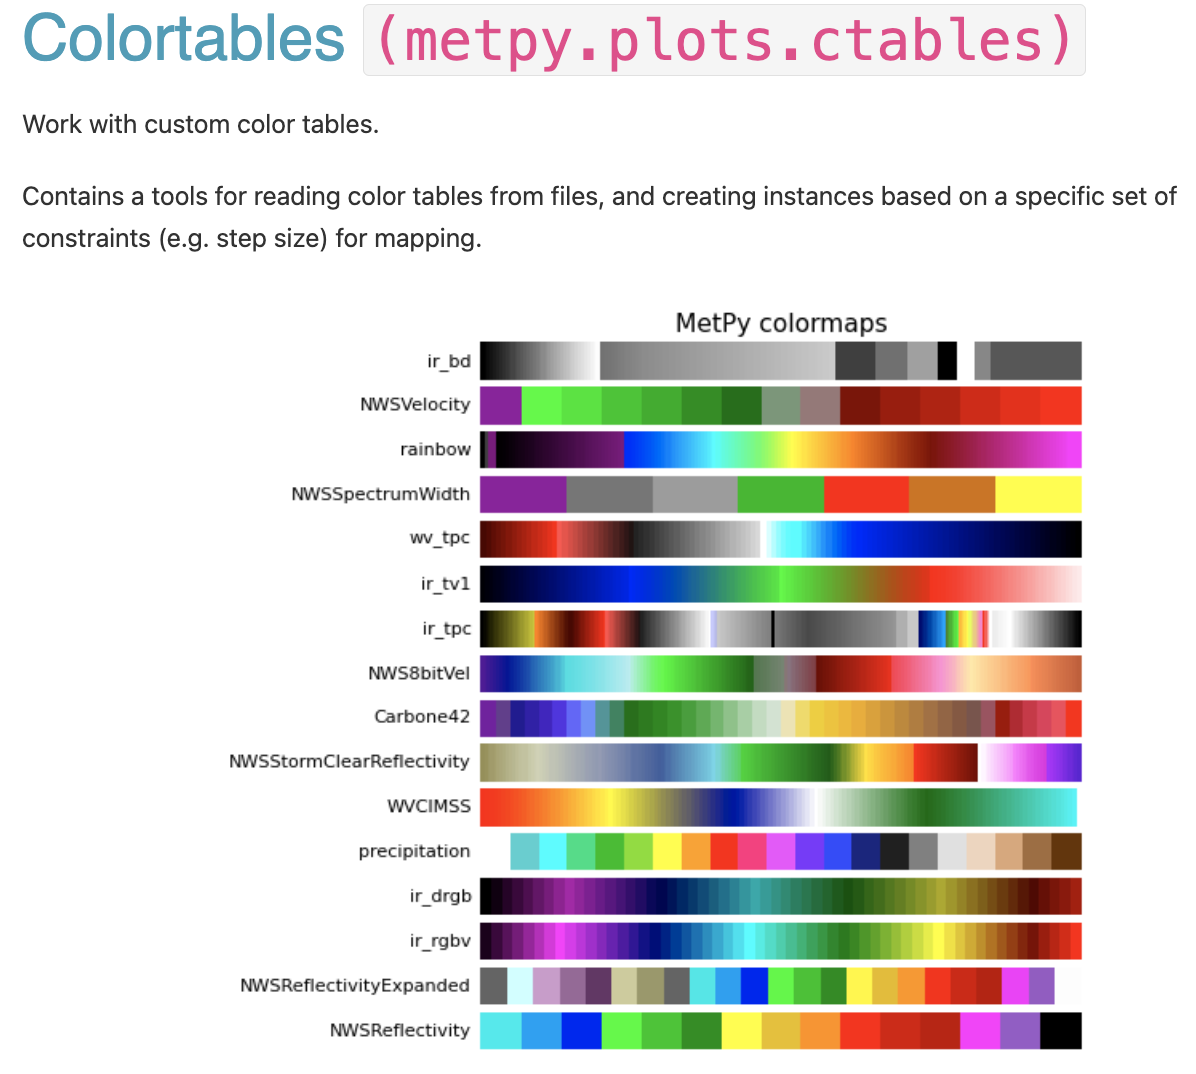


In [ ]:
#Set a radar reflectivity colormap
cmap = colortables.get_colortable('NWSStormClearReflectivity')

#Florida Zoom!
# min_lon = -83.0  
# max_lon = -79.8  
# min_lat =  26.0  
# max_lat =  29.0  

#North Dakota
min_lon = -103.0  
max_lon = -99.0  
min_lat =  45.5  
max_lat =  49.0  


fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw=dict(projection=ccrs.PlateCarree()))

#Set range in reflectivity
img = ax.pcolormesh(lon, lat, ref, vmin=-30, vmax=79, cmap=cmap)
plt.colorbar(img, aspect=50, pad=0)

#Set extent and aspect ratio


#Add Features
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='darkgrey', linewidth = 0.25)
ax.add_feature(USSTATES.with_scale('5m'), linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'black', linewidth = 1,
               facecolor=cfeature.COLORS['water'], alpha=0.25, zorder=-1)
               
#add_metpy_logo(fig, 100, 15, size='small')

#Plot Location of the radar
latitude  = 	
longitude = 


# Plot the point on the map


# Optionally, add a label


#Make it purdy
plt.title(f'{station}: {ds.Reflectivity_HI.name}', loc='left')
plt.title(f'Valid Time: {vtime}', loc='right')
plt.show()

In [ ]:
#Pull radial velocity 
station = 
rngv    = 
azv     = 
#DRL add radial velocity
vr  = 

#DRL Convert azimuth and range locations in a polar coordinate system to lat/lon coordinates. 
#  See https://unidata.github.io/MetPy/v1.5/api/generated/metpy.calc.azimuth_range_to_lat_lon.html
lonv, latv = 

#Diagnostic (check shape)


In [ ]:
#Collapse the first dimension so that 3D --> 2D
vrf =  

#Check shape again


In [ ]:
#Set a radar radial velocity colormap
#Could also use: 'NWSVelocity')  
cmap = colortables.get_colortable('NWS8bitVel')  

#Florida Zoom!
# min_lon = -83.0  #-87.5
# max_lon = -79.8  #-79.0
# min_lat =  26.0  # 24.0
# max_lat =  29.0  # 31.0

#North Dakota
min_lon = -103.0  
max_lon = -99.0  
min_lat =  45.5  
max_lat =  49.0  


fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw=dict(projection=ccrs.PlateCarree()))

#Set range in radial velocity
img = ax.pcolormesh(lonv, latv, vrf, vmin=-40, vmax=40, cmap=cmap)
plt.colorbar(img, aspect=50, pad=0)

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())
ax.set_aspect('equal', 'datalim')

ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='darkgrey', linewidth = 0.25)
ax.add_feature(USSTATES.with_scale('5m'), linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'black', linewidth = 1,
               facecolor=cfeature.COLORS['water'], alpha=0.25, zorder=-1)

#add_metpy_logo(fig, 100, 15, size='small')

# Plot the point on the map
ax.plot(longitude, latitude, marker='o', color='black', markersize=6, transform=ccrs.PlateCarree())

# Optionally, add a label
ax.text(longitude + 0.05, latitude + 0.05, 'KBIS', color='black', fontsize=10, transform=ccrs.PlateCarree())

plt.title(f'{station}: {ds.RadialVelocity_HI.name}', loc='left')
plt.title(f'Valid Time: {vtime}', loc='right')
plt.show()

DRL Amazon Bucket has real-time data as well - and a much longer archive 
https://registry.opendata.aws/noaa-nexrad/

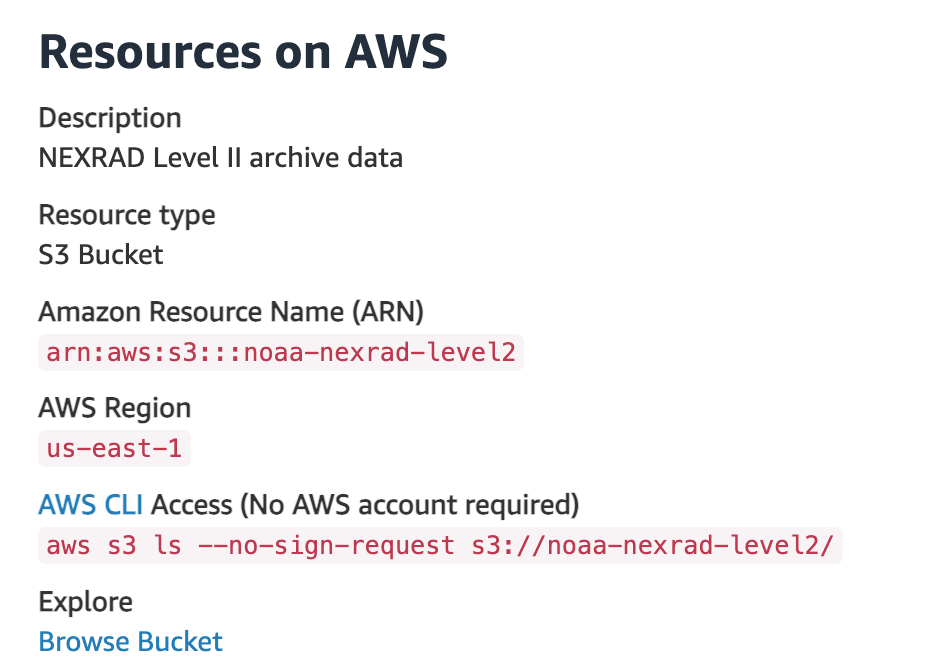


In [ ]:
#You will need this library https://pypi.org/project/nexradaws/
#!pip install nexradaws
!pip install --upgrade nexradaws

In [ ]:
import nexradaws
import tempfile

In [ ]:
### Define the radar, start time and end time
radar_id = 'KMLB'
#DRL For additional radar ID's see: https://www.weather.gov/media/tg/wsr88d-radar-list.pdf

#Set start and end time for the derecho using pandas date/time stamp
start = pd.Timestamp(2025,11,19,12, 0).tz_localize(tz='UTC')
end   = pd.Timestamp(2025,11,19,13, 0).tz_localize(tz='UTC')

In [ ]:
#DRL This creates a temporary location on your hard drive (/var/...)! 
templocation = '/Users/slazarus_admin/Downloads/temp_radar'

In [ ]:
from nexradaws import NexradAwsInterface

# #### Pull the radar data from the AWS level II radar archive bucket
conn = NexradAwsInterface()  # No anon argument
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))
print(scans[0:4])

## download these files
#results = conn.download(scans[0:2], templocation)
results = conn.download(scans, templocation)

In [ ]:
from nexradaws import NexradAwsInterface
from datetime import datetime

# Create anonymous connection
conn = NexradAwsInterface()

# Define time range and radar ID
start = datetime(2025, 11, 19, 12, 0)
end   = datetime(2025, 11, 19, 13, 0)
radar_id = "KMLB"

# Get available scans
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print(f"Found {len(scans)} scans")

In [ ]:
templocation